<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/N_beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install 'u8darts[all]'

     |████████████████████████████████| 143kB 7.6MB/s 
     |████████████████████████████████| 6.8MB 6.3MB/s 
     |████████████████████████████████| 25.9MB 1.8MB/s 
     |████████████████████████████████| 8.7MB 35.9MB/s 
     |████████████████████████████████| 112kB 54.5MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 788kB 38.1MB/s 
     |████████████████████████████████| 10.5MB 18.5MB/s 
     |████████████████████████████████| 14.6MB 142kB/s 
     |████████████████████████████████| 1.5MB 40.0MB/s 
     |████████████████████████████████| 10.6MB 23.9MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 368kB 45.2MB/s 
     |████████████████████████████████| 2.1MB 40.9MB/s 
  Created wheel for holidays: filename=holidays-0.10.2-cp37-none-any.whl size=111560 sha256=90a018061d4b08ffabe169280b20c735245c81b054b2e8a0bf17396384080506
  Stored in directory: /root/.cache/pip/wheels/68/55/29/95836cc

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score

In [4]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8,5))
    if (start_date):
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label='actual')
    pred_series.plot(label=('historic ' + forecast_type + ' forecasts'))
    plt.title('R2: {}'.format(r2_score(ts_transformed.univariate_component(0), pred_series)))
    plt.legend();

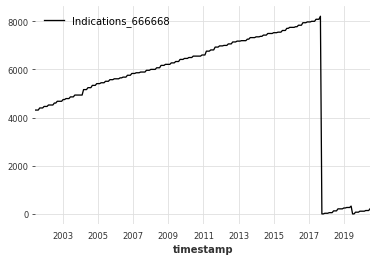

In [6]:
df_666668 = pd.read_csv('/content/provision_666668.csv',delimiter=',')   
df_666668.timestamp = pd.to_datetime(df_666668['timestamp'], format ='%d-%m-%y')
df_666668 =df_666668.set_index(['timestamp'])
df_666668 =df_666668.resample('M').ffill()
df_666668 =df_666668.reset_index()
series_666668 = TimeSeries.from_dataframe(df_666668,'timestamp', ['indication'])

series_666668.plot(label='Indications_666668')
plt.legend();

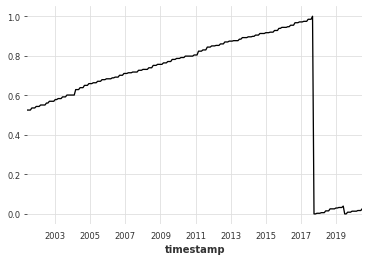

In [10]:
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(filler.transform(
    TimeSeries.from_dataframe(df_666668, 'timestamp', ['indication'])
))
series.plot()

In [55]:
df_666668['timestamp']

0     2001-06-30
1     2001-07-31
2     2001-08-31
3     2001-09-30
4     2001-10-31
         ...    
225   2020-03-31
226   2020-04-30
227   2020-05-31
228   2020-06-30
229   2020-07-31
Name: timestamp, Length: 230, dtype: datetime64[ns]

In [47]:
train, val = series.split_after(pd.Timestamp('2018-03-31'))

# **General model**

In [67]:
model_nbeats = NBEATSModel(
    input_chunk_length=3,
    output_chunk_length=2,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=10,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=25,
    model_name='nbeats_run'
)

In [68]:
model_nbeats.fit(train, val_series=val, verbose=True)

[2021-03-04 00:10:24,080] INFO | darts.models.torch_forecasting_model | Train dataset contains 197 samples.
[2021-03-04 00:10:24,080] INFO | darts.models.torch_forecasting_model | Train dataset contains 197 samples.
  1%|          | 1/100 [00:00<00:19,  4.96it/s]

  2%|▏         | 2/100 [00:00<00:19,  4.92it/s]

  3%|▎         | 3/100 [00:00<00:19,  4.86it/s]

  5%|▌         | 5/100 [00:01<00:19,  4.96it/s]

  7%|▋         | 7/100 [00:01<00:17,  5.17it/s]

  9%|▉         | 9/100 [00:01<00:17,  5.29it/s]

 11%|█         | 11/100 [00:02<00:16,  5.30it/s]

 13%|█▎        | 13/100 [00:02<00:16,  5.30it/s]

 15%|█▌        | 15/100 [00:02<00:16,  5.27it/s]

 17%|█▋        | 17/100 [00:03<00:15,  5.38it/s]

 19%|█▉        | 19/100 [00:03<00:15,  5.33it/s]

 21%|██        | 21/100 [00:04<00:14,  5.40it/s]

 23%|██▎       | 23/100 [00:04<00:14,  5.43it/s]

 25%|██▌       | 25/100 [00:04<00:13,  5.43it/s]

 26%|██▌       | 26/100 [00:04<00:14,  5.24it/s]

 28%|██▊       | 28/100 [00:05<00:14,  5.04it/s]

 30%|███       | 30/100 [00:05<00:14,  4.98it/s]

 31%|███       | 31/100 [00:05<00:13,  4.95it/s]

 32%|███▏      | 32/100 [00:06<00:13,  4.90it/s]

 33%|███▎      | 33/100 [00:06<00:13,  4.90it/s]

 35%|███▌      | 35/100 [00:06<00:13,  4.89it/s]

 36%|███▌      | 36/100 [00:07<00:13,  4.84it/s]

 37%|███▋      | 37/100 [00:07<00:12,  4.87it/s]

 38%|███▊      | 38/100 [00:07<00:12,  4.88it/s]

 39%|███▉      | 39/100 [00:07<00:12,  4.85it/s]

 40%|████      | 40/100 [00:07<00:12,  4.81it/s]

 42%|████▏     | 42/100 [00:08<00:11,  4.88it/s]

 43%|████▎     | 43/100 [00:08<00:11,  4.87it/s]

 44%|████▍     | 44/100 [00:08<00:11,  4.84it/s]

 46%|████▌     | 46/100 [00:09<00:11,  4.85it/s]

 47%|████▋     | 47/100 [00:09<00:10,  4.84it/s]

 48%|████▊     | 48/100 [00:09<00:10,  4.82it/s]

 49%|████▉     | 49/100 [00:09<00:12,  4.18it/s]

 50%|█████     | 50/100 [00:10<00:11,  4.35it/s]

 51%|█████     | 51/100 [00:10<00:10,  4.48it/s]

 52%|█████▏    | 52/100 [00:10<00:10,  4.59it/s]

 53%|█████▎    | 53/100 [00:10<00:10,  4.63it/s]

 54%|█████▍    | 54/100 [00:10<00:09,  4.63it/s]

 55%|█████▌    | 55/100 [00:11<00:09,  4.69it/s]

 56%|█████▌    | 56/100 [00:11<00:09,  4.74it/s]

 57%|█████▋    | 57/100 [00:11<00:08,  4.79it/s]

 59%|█████▉    | 59/100 [00:11<00:08,  4.94it/s]

 60%|██████    | 60/100 [00:12<00:08,  4.82it/s]

 62%|██████▏   | 62/100 [00:12<00:07,  4.96it/s]

 63%|██████▎   | 63/100 [00:12<00:07,  4.98it/s]

 64%|██████▍   | 64/100 [00:12<00:07,  4.94it/s]

 65%|██████▌   | 65/100 [00:13<00:07,  4.80it/s]

 66%|██████▌   | 66/100 [00:13<00:07,  4.79it/s]

 67%|██████▋   | 67/100 [00:13<00:06,  4.82it/s]

 68%|██████▊   | 68/100 [00:13<00:06,  4.78it/s]

 69%|██████▉   | 69/100 [00:13<00:06,  4.78it/s]

 70%|███████   | 70/100 [00:14<00:06,  4.79it/s]

 72%|███████▏  | 72/100 [00:14<00:05,  4.99it/s]

 74%|███████▍  | 74/100 [00:14<00:05,  5.09it/s]

 75%|███████▌  | 75/100 [00:15<00:04,  5.05it/s]

 77%|███████▋  | 77/100 [00:15<00:04,  5.11it/s]

 79%|███████▉  | 79/100 [00:15<00:04,  5.15it/s]

 81%|████████  | 81/100 [00:16<00:03,  5.18it/s]

 82%|████████▏ | 82/100 [00:16<00:03,  5.21it/s]

 84%|████████▍ | 84/100 [00:16<00:03,  5.12it/s]

 86%|████████▌ | 86/100 [00:17<00:02,  5.24it/s]

 88%|████████▊ | 88/100 [00:17<00:02,  5.31it/s]

 90%|█████████ | 90/100 [00:18<00:01,  5.15it/s]

 92%|█████████▏| 92/100 [00:18<00:01,  5.17it/s]

 93%|█████████▎| 93/100 [00:18<00:01,  5.26it/s]

 94%|█████████▍| 94/100 [00:18<00:01,  5.12it/s]

 96%|█████████▌| 96/100 [00:19<00:00,  5.14it/s]

 98%|█████████▊| 98/100 [00:19<00:00,  5.03it/s]

 99%|█████████▉| 99/100 [00:19<00:00,  5.05it/s]

100%|██████████| 100/100 [00:20<00:00,  4.99it/s]

100%|██████████| 5/5 [00:00<00:00, 51.87it/s]
[2021-03-04 00:10:46,481] WARNING | darts.timeseries | The inferred frequency does not match the value of the "freq" argument.


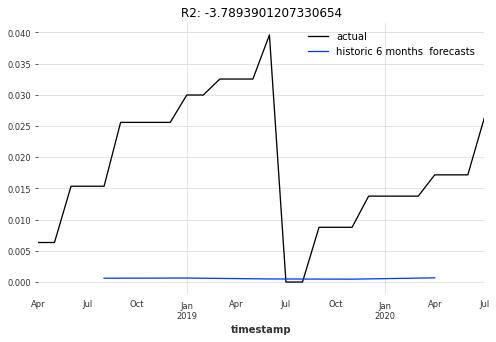

In [69]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp('2018-03-31'), 
    forecast_horizon=6,
    stride=5,
    retrain=False,
    verbose=True
)
display_forecast(pred_series, series['0'], '6 months ', start_date=pd.Timestamp('2018-03-31'))

# **Interpretable model**

In [64]:
model_nbeats = NBEATSModel(
    input_chunk_length=3,
    output_chunk_length=2,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=35,
    model_name='nbeats_interpretable_run'
)

In [65]:
model_nbeats.fit(series=train, val_series=val, verbose=True)

[2021-03-04 00:07:38,422] INFO | darts.models.torch_forecasting_model | Train dataset contains 197 samples.
[2021-03-04 00:07:38,422] INFO | darts.models.torch_forecasting_model | Train dataset contains 197 samples.
  1%|          | 1/100 [00:00<00:35,  2.80it/s]

  2%|▏         | 2/100 [00:00<00:34,  2.84it/s]

  3%|▎         | 3/100 [00:01<00:33,  2.85it/s]

  4%|▍         | 4/100 [00:01<00:33,  2.86it/s]

  5%|▌         | 5/100 [00:01<00:33,  2.87it/s]

  6%|▌         | 6/100 [00:02<00:31,  2.99it/s]

  7%|▋         | 7/100 [00:02<00:32,  2.90it/s]

  8%|▊         | 8/100 [00:02<00:30,  3.05it/s]

  9%|▉         | 9/100 [00:02<00:28,  3.21it/s]

 10%|█         | 10/100 [00:03<00:27,  3.26it/s]

 11%|█         | 11/100 [00:03<00:30,  2.96it/s]

 12%|█▏        | 12/100 [00:03<00:29,  3.03it/s]

 13%|█▎        | 13/100 [00:04<00:27,  3.12it/s]

 14%|█▍        | 14/100 [00:04<00:26,  3.24it/s]

 15%|█▌        | 15/100 [00:04<00:25,  3.34it/s]

 16%|█▌        | 16/100 [00:05<00:26,  3.19it/s]

 17%|█▋        | 17/100 [00:05<00:27,  3.03it/s]

 18%|█▊        | 18/100 [00:05<00:25,  3.16it/s]

 19%|█▉        | 19/100 [00:06<00:25,  3.18it/s]

 20%|██        | 20/100 [00:06<00:25,  3.12it/s]

 21%|██        | 21/100 [00:06<00:25,  3.12it/s]

 22%|██▏       | 22/100 [00:07<00:24,  3.15it/s]

 23%|██▎       | 23/100 [00:07<00:23,  3.21it/s]

 24%|██▍       | 24/100 [00:07<00:23,  3.28it/s]

 25%|██▌       | 25/100 [00:07<00:22,  3.36it/s]

 26%|██▌       | 26/100 [00:08<00:24,  3.06it/s]

 27%|██▋       | 27/100 [00:08<00:23,  3.08it/s]

 28%|██▊       | 28/100 [00:09<00:22,  3.15it/s]

 29%|██▉       | 29/100 [00:09<00:22,  3.17it/s]

 30%|███       | 30/100 [00:09<00:21,  3.22it/s]

 31%|███       | 31/100 [00:09<00:20,  3.34it/s]

 32%|███▏      | 32/100 [00:10<00:20,  3.38it/s]

 33%|███▎      | 33/100 [00:10<00:19,  3.40it/s]

 34%|███▍      | 34/100 [00:10<00:19,  3.44it/s]

 35%|███▌      | 35/100 [00:11<00:18,  3.47it/s]

 36%|███▌      | 36/100 [00:11<00:18,  3.50it/s]

 37%|███▋      | 37/100 [00:11<00:18,  3.50it/s]

 38%|███▊      | 38/100 [00:11<00:17,  3.47it/s]

 39%|███▉      | 39/100 [00:12<00:17,  3.50it/s]

 40%|████      | 40/100 [00:12<00:17,  3.47it/s]

 41%|████      | 41/100 [00:12<00:16,  3.48it/s]

 42%|████▏     | 42/100 [00:13<00:16,  3.51it/s]

 43%|████▎     | 43/100 [00:13<00:16,  3.52it/s]

 44%|████▍     | 44/100 [00:13<00:15,  3.51it/s]

 45%|████▌     | 45/100 [00:13<00:15,  3.53it/s]

 46%|████▌     | 46/100 [00:14<00:15,  3.39it/s]

 47%|████▋     | 47/100 [00:14<00:15,  3.40it/s]

 48%|████▊     | 48/100 [00:14<00:15,  3.38it/s]

 49%|████▉     | 49/100 [00:15<00:14,  3.43it/s]

 50%|█████     | 50/100 [00:15<00:14,  3.41it/s]

 51%|█████     | 51/100 [00:15<00:14,  3.42it/s]

 52%|█████▏    | 52/100 [00:15<00:14,  3.26it/s]

 53%|█████▎    | 53/100 [00:16<00:14,  3.35it/s]

 54%|█████▍    | 54/100 [00:16<00:13,  3.32it/s]

 55%|█████▌    | 55/100 [00:16<00:14,  3.21it/s]

 56%|█████▌    | 56/100 [00:17<00:14,  3.02it/s]

 57%|█████▋    | 57/100 [00:17<00:13,  3.07it/s]

 58%|█████▊    | 58/100 [00:17<00:13,  3.18it/s]

 59%|█████▉    | 59/100 [00:18<00:13,  3.11it/s]

 60%|██████    | 60/100 [00:18<00:12,  3.13it/s]

 61%|██████    | 61/100 [00:18<00:12,  3.19it/s]

 62%|██████▏   | 62/100 [00:19<00:12,  2.98it/s]

 63%|██████▎   | 63/100 [00:19<00:12,  3.05it/s]

 64%|██████▍   | 64/100 [00:19<00:11,  3.14it/s]

 65%|██████▌   | 65/100 [00:20<00:10,  3.25it/s]

 66%|██████▌   | 66/100 [00:20<00:10,  3.33it/s]

 67%|██████▋   | 67/100 [00:20<00:09,  3.36it/s]

 68%|██████▊   | 68/100 [00:21<00:09,  3.34it/s]

 69%|██████▉   | 69/100 [00:21<00:09,  3.30it/s]

 70%|███████   | 70/100 [00:21<00:09,  3.27it/s]

 71%|███████   | 71/100 [00:21<00:08,  3.35it/s]

 72%|███████▏  | 72/100 [00:22<00:08,  3.41it/s]

 73%|███████▎  | 73/100 [00:22<00:07,  3.42it/s]

 74%|███████▍  | 74/100 [00:22<00:07,  3.42it/s]

 75%|███████▌  | 75/100 [00:23<00:07,  3.39it/s]

 76%|███████▌  | 76/100 [00:23<00:06,  3.43it/s]

 77%|███████▋  | 77/100 [00:23<00:06,  3.43it/s]

 78%|███████▊  | 78/100 [00:23<00:06,  3.47it/s]

 79%|███████▉  | 79/100 [00:24<00:06,  3.50it/s]

 80%|████████  | 80/100 [00:24<00:05,  3.49it/s]

 81%|████████  | 81/100 [00:24<00:05,  3.26it/s]

 82%|████████▏ | 82/100 [00:25<00:05,  3.29it/s]

 83%|████████▎ | 83/100 [00:25<00:05,  3.26it/s]

 84%|████████▍ | 84/100 [00:25<00:04,  3.28it/s]

 85%|████████▌ | 85/100 [00:26<00:04,  3.39it/s]

 86%|████████▌ | 86/100 [00:26<00:04,  3.42it/s]

 87%|████████▋ | 87/100 [00:26<00:03,  3.44it/s]

 88%|████████▊ | 88/100 [00:26<00:03,  3.36it/s]

 89%|████████▉ | 89/100 [00:27<00:03,  3.35it/s]

 90%|█████████ | 90/100 [00:27<00:02,  3.38it/s]

 91%|█████████ | 91/100 [00:27<00:02,  3.35it/s]

 92%|█████████▏| 92/100 [00:28<00:02,  3.35it/s]

 93%|█████████▎| 93/100 [00:28<00:02,  3.40it/s]

 94%|█████████▍| 94/100 [00:28<00:01,  3.41it/s]

 95%|█████████▌| 95/100 [00:28<00:01,  3.46it/s]

 96%|█████████▌| 96/100 [00:29<00:01,  3.44it/s]

 97%|█████████▋| 97/100 [00:29<00:00,  3.46it/s]

 98%|█████████▊| 98/100 [00:29<00:00,  3.47it/s]

 99%|█████████▉| 99/100 [00:30<00:00,  3.46it/s]

100%|██████████| 100/100 [00:30<00:00,  3.29it/s]

100%|██████████| 5/5 [00:00<00:00, 34.53it/s]
[2021-03-04 00:08:34,075] WARNING | darts.timeseries | The inferred frequency does not match the value of the "freq" argument.


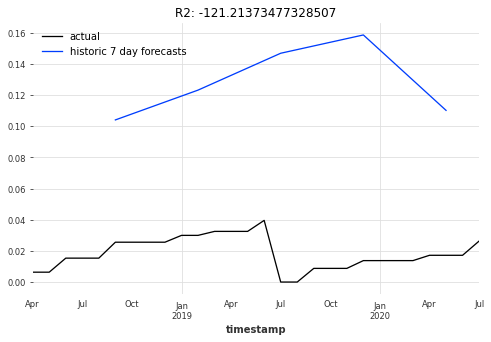

In [66]:

pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp('20180331'), 
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True
)
display_forecast(pred_series, series['0'], '7 day', start_date=pd.Timestamp('20180331'))